<a href="https://colab.research.google.com/github/Mariana2079/Sistemas-inteligentes/blob/main/T2_inteligentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
from google.colab import files

data = pd.read_csv('dataset.csv') 

In [ ]:
X = data[["platelets","creatinine_phosphokinase"]].to_numpy()
y = data[["age"]].to_numpy()
w = np.array([0,0])
b = np.array([0])
learning_rate = 0.00000000000000000001
errol = 0


In [ ]:
for i in range(0,50):
    for x,y_true in zip (X,y): #for com x[i] e y[i]
      # np.disp(x)
      # np.disp(y_true)
      y_pred = np.dot(x,w) + b
      # np.disp(y_pred)
      erro = (y_pred - y_true) #diferenca entre a saida de dados reais e os dados preditos
      # np.disp(erro)
      delta_w = erro * x
      delta_b = erro
      # np.disp(delta_w)
      # np.disp(delta_b)
      w = w + learning_rate * -(delta_w) #atualização dos pesos w
      #np.disp(w)
      b = b + learning_rate * -(delta_b) #atualização do bias b
      #np.disp(b)
      errol = errol + (0.5 * (erro**2)) # 0.5 é da derivada (1/2)
      np.disp(errol)

[2812.5]
[4324.99999712]
[6437.4999935]
[7687.49998879]
[9799.99997702]
[13849.99996294]
[16662.4999539]
[18462.49992542]
[20574.99990286]
[23774.99985665]
[26587.49980699]
[28509.49977444]
[29521.99976078]
[30771.99972913]
[31972.49967826]
[35334.49966808]
[39118.99960701]
[40131.4995853]
[42581.49953583]
[43733.49952268]
[45845.99946547]
[47958.49940043]
[50270.49933043]
[51674.99925713]
[54487.49917904]
[57687.49912956]
[62199.99905005]
[64649.99896146]
[66331.99892015]
[69693.99884235]
[74111.99872085]
[77724.4985631]
[78974.49847599]
[80224.49839111]
[82336.99832058]
[84717.49822785]
[88767.49810476]
[92129.49794012]
[93929.49782084]
[95729.49768856]
[98179.49756139]
[99429.4975072]
[101879.49741449]
[104471.49730008]
[106271.49721341]
[107521.4970962]
[108821.99698954]
[110621.99677697]
[113821.99668596]
[115446.49650048]
[117758.49640495]
[119162.99621496]
[120962.99607594]
[123412.9958559]
[125212.99571512]
[129725.49530545]
[132175.49515259]
[133975.49502366]
[135175.99486613]

In [ ]:
w0 = np.random.rand(3,1) #w0 = valor do bias x0 * [1]
w1 = np.random.rand(3,1) #w1 = peso 1
w2 = np.random.rand(3,1) #w2 = peso 2

x1 = np.array(data.iloc[:,0])  #x1 = valores reais, coluna 0
x2 = np.array(data.iloc[:,2])  #x2 = valores reais, coluna 2

z = x1 * w1 + x2 * w2 + w0 # z = valores preditos
t = data.iloc[:,4] #valor real a ser aproximado

In [ ]:
# Define the neural network function y = x * w
def nn(x, w):
  z = x * w
  return  z

#Define the function of activation
def activation(z):
  y = z
  return y

# Define the cost function
def cost(z, t, m):
  # calcula o erro, m = qtde de elementos
  error = y - t
  return 1 / (2 * m)  * np.dot(error.T, error)
  def cost(z, t, m):

# Define the gradient function
def gradient(x, w, t, m):
#chama a função que realiza a multiplicação e soma entre a matrix de entrada(X) e a matrix de pesos(w)
  z = nn(x, w)
  z = activation(z) #	aplica a saida do neuronio sobre uma função de ativação
  erro = z - t # calcula o erro
  return (2/m) * np.dot(x.T, error)

# Define the update function delta w
def delta_w(m, x, t, learning_rate):
  return learning_rate * gradient(x, w, t, m).sum()

def train(m, x, y):
  ##define a constante da quantidade de elementos que será usada no calculo do gradiente
  m = len(x)
  ##adiciona uma coluna com valores iguais a 1 para gerar o bias
  x = np.hstack((x, np.ones((m, 1))))
  
  ##inicializa os pesos
  w_ = np.random.rand(x.shape[1],1)

  ##atributos de pesos historicos
  w_hist_ = np.array([np.squeeze(w_.reshape(-1,1))])
  
  # Start performing the gradient descent updates, and print the weights and cost:
  w_cost = [cost(activation(nn(x)), y)]
  for i in range(iterations):
      dw = delta_w(x, y)  # Get the delta w update
      w_ = (np.squeeze(w_) - np.squeeze(dw)).reshape(-1,1)  # Update the current weight parameter
      w_cost.append(cost(activation(nn(x)), y))
      w_hist_ = np.vstack((w_hist_, np.squeeze(w_.reshape(-1,1)) ))
  
  w_hist_ = pd.DataFrame(w_hist_, columns=["W_"+str(i+1) if i<w_hist_.shape[1]-1 else "BIAS" for i in range(.w_hist_.shape[1])])
  w_hist_["Iteration"] = w_hist_.index
  cols = w_hist_.columns.tolist()
  w_hist_ = w_hist_[cols[-1:] + cols[:-1]]
  w_hist_["Cost"] = w_cost

def predict(m, x):
  ##adiciona uma coluna com valores iguais a 1 para utilizar o bias
  x = np.hstack((x, np.ones((len(x), 1))))
  ##realiza a predição
  return activation(nn(x))

def history(m):
  # Print the final w, and cost
  for i in range(0, len(w_cost)):
      print('Iteration {} = Cost {:.5f}' .format(i,w_cost[i]))

IndentationError: ignored

In [ ]:
net = rede(activation_name="identity", alpha=0.25, learning_rate=0.1, iterations=10)

In [ ]:
net.train(x_tra, y_tra)

In [ ]:
net.history()

Iteration 0 = Cost 0.00038
Iteration 1 = Cost 0.00038
Iteration 2 = Cost 0.00038
Iteration 3 = Cost 0.00038
Iteration 4 = Cost 0.00038
Iteration 5 = Cost 0.00038
Iteration 6 = Cost 0.00038
Iteration 7 = Cost 0.00038
Iteration 8 = Cost 0.00038
Iteration 9 = Cost 0.00038
Iteration 10 = Cost 0.00038


In [ ]:
net.w_

array([[ 0.41650465],
       [ 0.71922492],
       [-0.0009408 ]])

In [ ]:
net.w_hist_

,Iteration,W_1,W_2,BIAS,Cost
0,0,0.417022,0.720324,0.000114,0.000378
1,1,0.416970,0.720214,-0.000122,0.000377
2,2,0.416918,0.720104,-0.000312,0.000377
3,3,0.416867,0.719994,-0.000463,0.000377
4,4,0.416815,0.719884,-0.000584,0.000377
5,5,0.416763,0.719774,-0.000681,0.000377
6,6,0.416711,0.719664,-0.000758,0.000376
7,7,0.416660,0.719554,-0.000820,0.000376
8,8,0.416608,0.719444,-0.000870,0.000376
9,9,0.416556,0.719335,-0.000909,0.000376


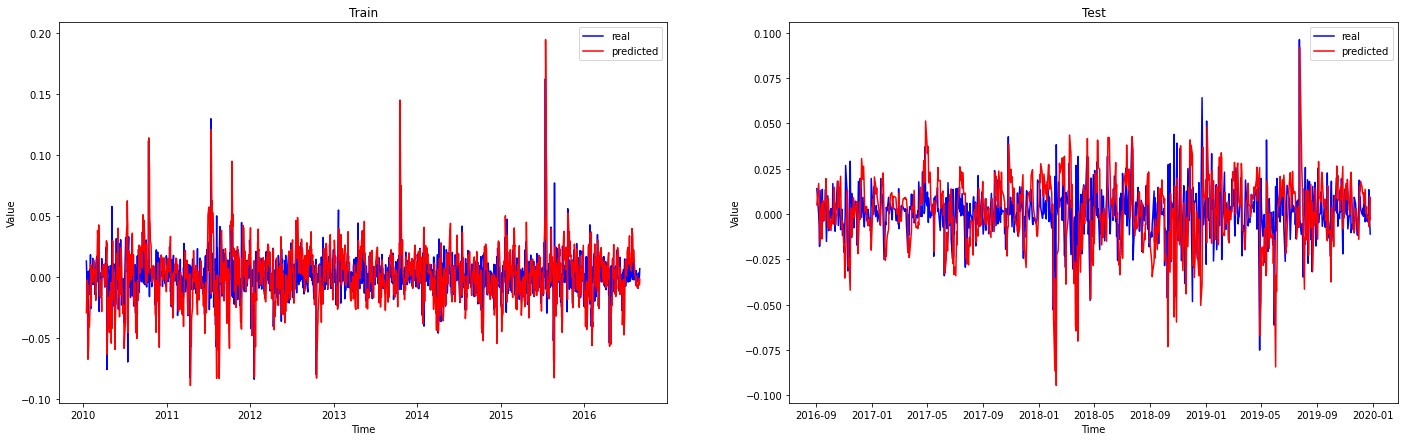

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 7))
axs[0].plot(df_data.index[:k], y_tra, color = 'blue')
axs[0].plot(df_data.index[:k], net.predict(x_tra), color = 'red')
axs[0].legend(["real","predicted"], loc="best")
axs[0].set_title('Train')
axs[1].plot(df_data.index[k:], y_tes, color = 'blue')
axs[1].plot(df_data.index[k:], net.predict(x_tes), color = 'red')
axs[1].legend(["real","predicted"], loc="best")
axs[1].set_title('Test')
for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='Value')

In [ ]:
print("MAE Error in Train {:.5f}".format(mae(y_tra,net.predict(x_tra))))
print("MSE Error in Train {:.5f}".format(mse(y_tra,net.predict(x_tra))))
print("MAE Error in Test {:.5f}".format(mae(y_tes,net.predict(x_tes))))
print("MSE Error in Test {:.5f}".format(mse(y_tes,net.predict(x_tes))))

MAE Error in Train 0.01989
MSE Error in Train 0.00075
MAE Error in Test 0.01777
MSE Error in Test 0.00059


In [ ]:

from scipy.spatial import Delaunay
import plotly.figure_factory as ff

points2D = np.vstack([x_tra[:,0], x_tra[:,1]]).T
tri = Delaunay(points2D)
simplices = tri.simplices

fig = ff.create_trisurf(x_tra[:,0], x_tra[:,1], net.predict(x_tra), simplices=simplices, aspectratio=dict(x=1, y=1, z=0.3))
fig.show()


In [ ]:

from scipy.spatial import Delaunay
import plotly.figure_factory as ff

points2D = np.vstack([x_tes[:,0], x_tes[:,1]]).T
tri = Delaunay(points2D)
simplices = tri.simplices

fig = ff.create_trisurf(x_tes[:,0], x_tes[:,1], net.predict(x_tes), simplices=simplices, aspectratio=dict(x=1, y=1, z=0.3))
fig.show()


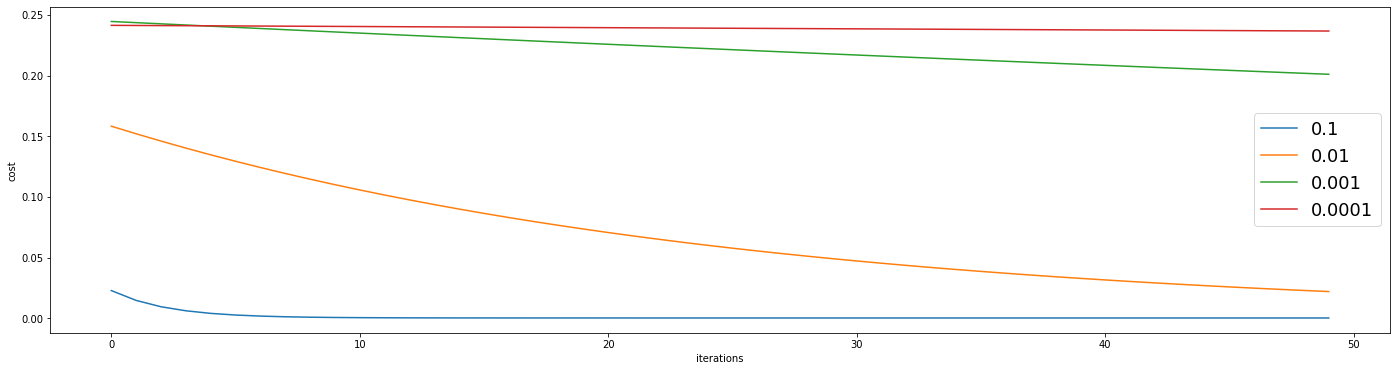

In [ ]:
arr_cost = []
for q in [.1, .01, .001, .0001]:
  net_tmp = rede(activation_name="identity", alpha=0.25, learning_rate=q, iterations=50)
  net_tmp.train(x_tra, y_tra)
  arr_cost.append(net_tmp.w_cost[1:])
arr_cost = np.array(arr_cost)


plt.figure(figsize=(24,6))
for q in range(0,4):
  plt.plot(np.squeeze(arr_cost[q:q+1 , :]))
plt.legend(["0.1","0.01","0.001","0.0001"], fontsize=18, loc="best")
plt.xlabel("iterations")
plt.ylabel("cost")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
def rpt(t, p):
  d_r = np.where( t > 0, 1, -1 )
  d_p = np.where( p > 0, 1, -1 )
  display(confusion_matrix(d_r, d_p))
  print(classification_report(d_r, d_p))

In [ ]:
rpt(y_tra, net.predict(x_tra))

array([[376, 427],
       [410, 457]])

              precision    recall  f1-score   support

          -1       0.48      0.47      0.47       803
           1       0.52      0.53      0.52       867

    accuracy                           0.50      1670
   macro avg       0.50      0.50      0.50      1670
weighted avg       0.50      0.50      0.50      1670



In [ ]:
rpt(y_tes, net.predict(x_tes))

array([[170, 223],
       [180, 262]])

              precision    recall  f1-score   support

          -1       0.49      0.43      0.46       393
           1       0.54      0.59      0.57       442

    accuracy                           0.52       835
   macro avg       0.51      0.51      0.51       835
weighted avg       0.51      0.52      0.51       835

